In [2]:
import requests
import nltk
import random
import time
from collections import Counter
from bs4 import BeautifulSoup

In [83]:
source = []
article = []
soup = []
for i in range(3):
    source.append(requests.get('https://www.wastedive.com/?page=' + str(i+1)).text)

    soup.append(BeautifulSoup(source[i], 'html5lib'))

    article.append(soup[i].find_all('h3', 'feed__title feed__title--display'))

print(len(article))

3


In [84]:
for each in article:
    print(len(each))
    print(each)

25
[<h3 class="feed__title feed__title--display">
                                <a href="/news/why-the-epas-decision-on-ep-waste-is-very-good-for-the-industry/556458/">
                                    
                                    Why the EPA's decision on E&amp;P waste is very good for the industry
                                </a>
                            </h3>, <h3 class="feed__title feed__title--display">
                                <a href="/news/madison-food-scrap-collection-pilot/556654/">
                                    
                                    Madison, Wisconsin relaunching curbside organics pilot
                                </a>
                            </h3>, <h3 class="feed__title feed__title--display">
                                <a href="/news/waste-management-dayton-ohio-landfill-settlement/556613/">
                                    
                                    Waste Management set to pay Dayton, Ohio $10.5M la

In [38]:
# def get_list_article_name(soup):
#     titlelist = []
#     dayarticle = soup.find_all('h3', class_='feed__title feed__title--display')
#     for article in dayarticle:
#         a = article.find_all('a')
#         for articletitle in a:
#             title = articletitle.contents[0]
#         titlelist.append(title)
#     return titlelist

In [39]:
# titlelist = get_list_article_name(soup)

In [37]:
# print(titlelist)

['\n                                    \n                                    Major recyclers deny still exporting plastic overseas\n                                ', "\n                                    \n                                    New Republic Services president: 'Death of landfills has been overexaggerated'\n                                ", "\n                                    \n                                    Covanta poised for WTE 'awakening' in US — if it comes\n                                ", "\n                                    \n                                    FCC Environmental plans to 'grow faster' in US, start acquiring\n                                ", '\n                                    \n                                    Washington becomes 10th state to pass EPR for paint\n                                ', "\n                                    \n                                    Waste Management COO: New Chicago MRF will be 'much m

In [273]:
def get_list_article_name(soup):
    titlelist = []
    for each in soup:
        feed_title = each.find_all('h3', 'feed__title feed__title--display')
        for article in feed_title:
            a = article.find_all('a')
            for articletitle in a:
                title = articletitle.contents[0]
                title1 = title.strip()
            titlelist.append(title1)
    return titlelist

In [274]:
titlelist = get_list_article_name(soup)

In [275]:
print(titlelist)
print(len(titlelist))

["Why the EPA's decision on E&P waste is very good for the industry", 'Madison, Wisconsin relaunching curbside organics pilot', 'Waste Management set to pay Dayton, Ohio $10.5M landfill settlement', 'Palo Alto, California approves sweeping single-use plastics ban', "Annual meeting results from the waste industry's top companies", 'Philadelphia poised to award Waste Management, Covanta disposal contracts', "Scrap Collector: Mount Everest now 'world's highest garbage dump'", 'Waste Management pursuing vertical expansion at Delaware landfill', 'Keurig Dr Pepper commits to 100% recyclable or compostable packaging by 2025', 'Florida county to perform extra groundwater monitoring at Waste Connections landfill', 'How recycling is changing in all 50 states', 'Republic attempting to exit Connecticut MRF contract via lawsuit', 'Philadelphia cancels recycling rewards program', 'Omaha council votes against FCC Environmental collection contract', 'Southern California city rejects new recycling cont

In [277]:
def get_list_nouns(titlelist):
    tokenslist = []
    for title in titlelist:
        tokens = nltk.word_tokenize(title)
        tags = nltk.pos_tag(tokens)
               
        for tag in tags :
            if tag[1] == 'NN' or tag[1] == 'NNPS' or tag[1] == 'NNS' or tag[1] == 'NNP':
                tokenslist.append(str(tag[0]))
    return tokenslist
tokenslist = get_list_nouns(titlelist)

In [278]:
print(tokenslist)

['EPA', 'decision', 'E', 'P', 'waste', 'industry', 'Madison', 'Wisconsin', 'organics', 'pilot', 'Waste', 'Management', 'Dayton', 'Ohio', 'landfill', 'settlement', 'Palo', 'Alto', 'California', 'plastics', 'ban', 'meeting', 'results', 'waste', 'industry', 'companies', 'Philadelphia', 'Waste', 'Management', 'Covanta', 'disposal', 'contracts', 'Scrap', 'Collector', 'Mount', 'Everest', 'garbage', 'dump', 'Waste', 'Management', 'expansion', 'Delaware', 'landfill', 'Keurig', 'Dr', 'Pepper', '%', 'packaging', 'Florida', 'county', 'groundwater', 'monitoring', 'Waste', 'Connections', 'landfill', 'recycling', 'states', 'Connecticut', 'MRF', 'contract', 'lawsuit', 'Philadelphia', 'cancels', 'rewards', 'program', 'Omaha', 'council', 'votes', 'FCC', 'Environmental', 'collection', 'contract', 'Southern', 'California', 'city', 'contract', 'market', 'volatility', 'companies', 'control', 'US', 'waste', 'industry', 'Texas', 'legislature', 'waste', 'laws', 'Court', 'St.', 'Paul', 'Minnesota', 'collection

In [279]:
print(len(tokenslist))

404


In [280]:
total = len(tokenslist)
print(total)

404


In [281]:
texte = ' '.join(tokenslist).lower()
list_words = set()
for each in tokenslist:
    list_words.add(each.lower())
list_words = list(list_words)

print(len(list_words))
number_word = {}
c = 0
for each in list_words:
    if len(each) > 1:
        for i in tokenslist:
            if each.lower() == i.lower():
                c += 1
        number_word[each] = c
        c = 0

print(number_word)

269
{'laws': 1, 'cincinnati': 1, 'incinerators': 1, 'impacts': 1, 'amy': 1, 'rules': 2, "'evergreen": 1, 'blockchain': 1, 'theft': 1, "'organics": 1, 'county': 2, 'food': 2, 'omaha': 2, 'landfill': 5, 'disposal': 3, 'illinois': 2, 'players': 1, 'la': 1, 'tons': 1, 'council': 1, 'everest': 1, 'lawsuit': 1, 'stalemate': 1, 'loop': 1, 'ash': 2, 'ripples': 1, 'ground': 1, 'reaches': 1, 'bioenergy': 1, 'development': 2, 'kentucky': 1, 'mandates': 1, 'epa': 2, 'date': 1, 'software': 1, 'control': 1, 'palo': 1, 'paper': 1, 'emissions': 1, 'hub': 1, 'franchise': 2, 'content': 1, 'wca': 1, 'alabama': 1, 'targets': 1, 'covanta': 2, 'rubicon': 1, 'approval': 1, 'wisconsin': 2, 'ban': 3, 'editor': 1, 'madison': 1, 'closure': 1, 'companies': 5, 'immigration': 1, 'california': 6, 'c.': 1, 'path': 1, 'paul': 1, 'board': 1, 'river': 1, 'talk': 1, 'fda': 1, 'paint': 1, 'washington': 1, 'director': 1, 'dayton': 1, 'collector': 6, 'repair': 1, 'consumerism': 1, 'votes': 1, 'nebraska': 1, 'capacity': 1, '

In [282]:
def get_order(name_and_occurences):
    return name_and_occurences[1]

number_word_sorted = sorted(number_word.items(), key = get_order)
print(number_word_sorted)

[('laws', 1), ('cincinnati', 1), ('incinerators', 1), ('impacts', 1), ('amy', 1), ("'evergreen", 1), ('blockchain', 1), ('theft', 1), ("'organics", 1), ('players', 1), ('la', 1), ('tons', 1), ('council', 1), ('everest', 1), ('lawsuit', 1), ('stalemate', 1), ('loop', 1), ('ripples', 1), ('ground', 1), ('reaches', 1), ('bioenergy', 1), ('kentucky', 1), ('mandates', 1), ('date', 1), ('software', 1), ('control', 1), ('palo', 1), ('paper', 1), ('emissions', 1), ('hub', 1), ('content', 1), ('wca', 1), ('alabama', 1), ('targets', 1), ('rubicon', 1), ('approval', 1), ('editor', 1), ('madison', 1), ('closure', 1), ('immigration', 1), ('c.', 1), ('path', 1), ('paul', 1), ('board', 1), ('river', 1), ('talk', 1), ('fda', 1), ('paint', 1), ('washington', 1), ('director', 1), ('dayton', 1), ('repair', 1), ('consumerism', 1), ('votes', 1), ('nebraska', 1), ('capacity', 1), ('climate', 1), ('momentum', 1), ("'beyond", 1), ('strategy', 1), ('ceo', 1), ('meeting', 1), ('landfills', 1), ('rewards', 1), (

In [283]:
tuple1 = number_word_sorted[227][1]
print(tuple1)

2


In [284]:
ratio = tuple1 /  len(list_words)
print(ratio)

0.007434944237918215


In [285]:
import matplotlib.pyplot as plt
import numpy as np

In [1]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = number_word_sorted[227][0], number_word_sorted[226][0], number_word_sorted[225][0], number_word_sorted[224][0]
sizes = [number_word_sorted[227][1]/len(list_words), number_word_sorted[226][1]/len(list_words), (number_word_sorted[225][1]+number_word_sorted[215][1])/len(list_words), number_word_sorted[224][1]/len(list_words)]
explode = (0.1, 0, 0, 0)  # only "explode" the 2nd slice (i.e. 'plastic')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)

ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

NameError: name 'number_word_sorted' is not defined

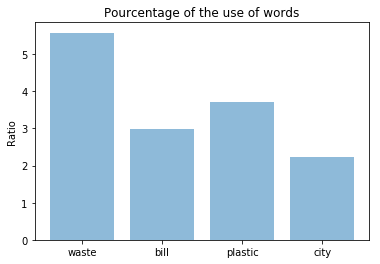

In [287]:
objects = (number_word_sorted[-1][0], number_word_sorted[-2][0], number_word_sorted[-9][0], number_word_sorted[-4][0])
y_pos = np.arange(len(objects))
performance = [number_word_sorted[-1][1]/len(list_words)*100, number_word_sorted[-2][1]/len(list_words)*100, (number_word_sorted[-3][1]+number_word_sorted[215][1])/len(list_words)*100, number_word_sorted[-4][1]/len(list_words)*100]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Ratio')
plt.title('Pourcentage of the use of words')

plt.show()

In [ ]:
# faire la même chose avec le summarypor comparer les résultats

# prendre d'autres articles et comparer